# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [2]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


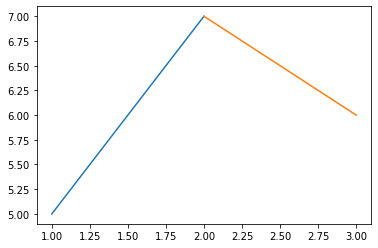

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

In [ ]:
def first_spline(x: np.ndarray, y: np.ndarray):
    """Funkcja wyznaczająca wartości współczynników spline pierwszego stopnia.

    Parametrs:
    x(float): argumenty, dla danych punktów
    y(float): wartości funkcji dla danych argumentów

    return (a,b) - krotka zawierająca współczynniki funkcji linowych"""
    if isinstance(x, (np.ndarray)) and isinstance(y, (np.ndarray)):
        a = list()
        b = list()
        if x.shape == y.shape:
                for i in range(len(x) - 1):
                    if x[i+1] - x[i] != 0:
                        a.append((y[i + 1] - y[i]) / (x[i + 1] - x[i]))
                        b.append(y[i] - a[i] * x[i])
                return np.array(a), np.array(b)
        else:
            return None
    else:
        return None

Zaimplementowano interpolację 1 stopnia. Danymi wejściowymi są 2 wektory: argumentów oraz wartości funkcji. Funkcja zwraca współczynniki funkcji liniowych w poszczególnych przedziałach.

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


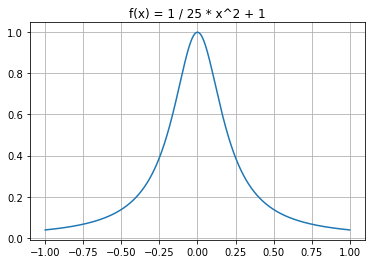

In [30]:
# Wykres funkcji f(x) = 1 / (25 * x ^ 2 + 1)

x = np.linspace(-1, 1, 1000)
f = lambda x: 1 / (25 * x ** 2 + 1)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.title("f(x) = 1 / 25 * x^2 + 1")
plt.show()

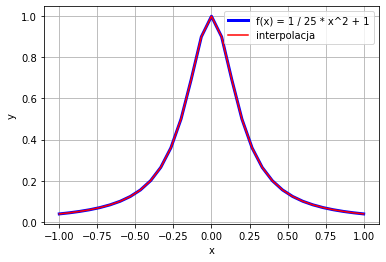

2.220446049250313e-16

In [31]:
# Interpolacja funkcją z pakietu scipy.interpolate.splprep

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: 1 / (25 * x ** 2 + 1)
y = f(x)
splrep = scipy.interpolate.splrep(x, y)
ysplrep = scipy.interpolate.splev(x, splrep)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = 1 / 25 * x^2 + 1")
plt.plot(x, ysplrep, 'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), ysplrep)


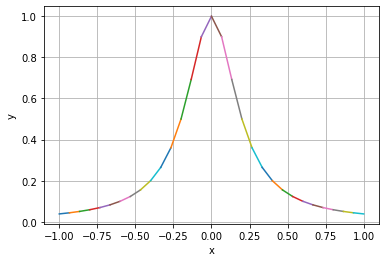

0.023043826227620023

In [32]:
# Interpolacja funkcją z zadania 1

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: 1 / (25 * x ** 2 + 1)
y = f(x)
a, b =main.first_spline(x,y)
y_abs = np.array([])
x_abs = np.array([])
f1 = [[b[i], a[i]] for i in range(len(a))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f1[i]))
    y_new = PolyCoefficients(x_new, f1[i])
    y_abs = np.append(y_abs, y_new)
    x_abs = np.append(x_abs, x_new)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

main.L_inf(y_abs, f(x_abs))

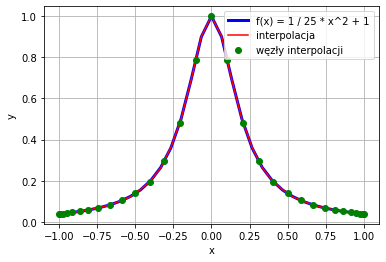

0.0022698158487263753

In [42]:
# Interpolacja barycentryczna

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: 1 / (25 * x ** 2 + 1)
weights = main.bar_czeb_weights(30)
node_x = main.chebyshev_nodes(30)
node_y = f(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = 1 / 25 * x^2 + 1")
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), yinp)


Interpolowano funkcję $ f(x) = \frac{1}{25x^2+1}$ trzema metodami: Funkcją z pakietu scipy.interpolate.splprep, funkcją first_spline z zadania 1 oraz metodą barycentryczną z węzłami równoodległymi, wykorzystując kod z z poprzednich laboratoriów.

Wykorzystując funkcję L_inf z poprzednich laboratoriów, oceniono jakość interpolacji z wartościami funkcji. Najgorzej wypadła funkcja first_spline z zadania 1, z błędem rzędu 10^-2. Następna była metoda barycentryczna, z błędem rzędu 10^-3. Zdecydowanie najlepiej wypadła wbudowana funkcja z pakietu scipy.interpolate.splprep, z błędem rzędu 10^-16.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


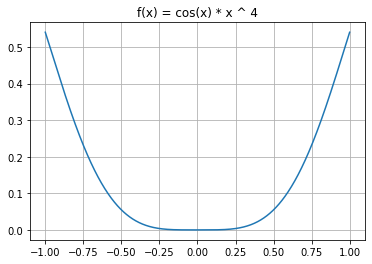

In [34]:
# Wykres funkcji cos(x)* x ^ 4

x = np.linspace(-1, 1, 1000)
f = lambda x: np.cos(x)* x ** 4
y = f(x)
plt.plot(x, y)
plt.grid()
plt.title("f(x) = cos(x) * x ^ 4")
plt.show()

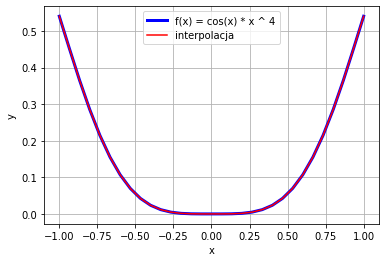

2.220446049250313e-16

In [35]:
# Interpolacja funkcją z pakietu scipy.interpolate.splprep

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: np.cos(x)* x ** 4
y = f(x)
splrep = scipy.interpolate.splrep(x, y)
ysplrep = scipy.interpolate.splev(x, splrep)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = cos(x) * x ^ 4")
plt.plot(x, ysplrep, 'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), ysplrep)

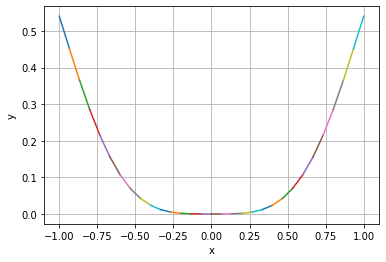

0.0014132564873418352

In [36]:
# Interpolacja funkcją z zadania 1

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: np.cos(x)* x ** 4
y = f(x)
a, b =main.first_spline(x,y)
y_abs = np.array([])
x_abs = np.array([])
f1 = [[b[i], a[i]] for i in range(len(a))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f1[i]))
    y_new = PolyCoefficients(x_new, f1[i])
    y_abs = np.append(y_abs, y_new)
    x_abs = np.append(x_abs, x_new)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

main.L_inf(y_abs, f(x_abs))

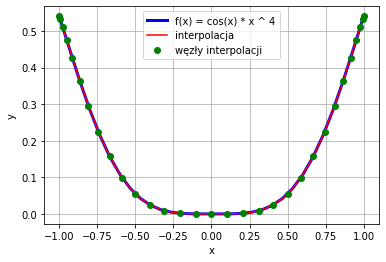

3.3306690738754696e-16

In [37]:
# Interpolacja barycentryczna

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: np.cos(x)* x ** 4
weights = main.bar_czeb_weights(30)
node_x = main.chebyshev_nodes(30)
node_y = f(node_x)
yinp = main.barycentric_inte(node_x, node_y, weights, x)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = cos(x) * x ^ 4")
plt.plot(x,yinp,'r',label = 'interpolacja')
plt.plot(node_x, node_y,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), yinp)



Analogicznie jak w zadaniu 2, interpolowano funkcję $ f(x) = cos(x)x^4$ trzema metodami: Funkcją z pakietu scipy.interpolate.splprep, funkcją first_spline z zadania 1 oraz metodą barycentryczną z węzłami równoodległymi.

Wykorzystując funkcję L_inf, oceniono jakość interpolacji z wartościami funkcji. Ponownie najgorzej wypadła funkcja first_spline z zadania 1, z błędem rzędu 10^-3. Funkcja z pakietu scipy.interpolate.splprep oraz metoda barycentryczna okazały się podobnie dokładne, z niemal jednakowym błędem rzędu 10^-16.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



In [ ]:
def cubic_spline(x: np.ndarray, y: np.ndarray, tol=1e-100):
    """
    Interpolacja splajnów cubicznych

    Returns:
    b współczynnik przy x stopnia 1
    c współczynnik przy x stopnia 2
    d współczynnik przy x stopnia 3
    """
    if isinstance(x, np.ndarray) and (y, np.ndarray):
        if x.shape == y.shape:
            x = np.array(x)
            y = np.array(y)
            if np.any(np.diff(x) < 0):
                idx = np.argsort(x)
                x = x[idx]
                y = y[idx]

            size = len(x)
            delta_x = np.diff(x)
            delta_y = np.diff(y)
        
            A = np.zeros(shape = (size,size))
            b = np.zeros(shape=(size,1))
            A[0,0] = 1
            A[-1,-1] = 1
        
            for i in range(1,size-1):
                A[i, i-1] = delta_x[i-1]
                A[i, i+1] = delta_x[i]
                A[i,i] = 2*(delta_x[i-1]+delta_x[i])
                b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])

            c = jacobi(A, b, np.zeros(len(A)), tol = tol, n_iterations=1000)
            d = np.zeros(shape = (size-1,1))
            b = np.zeros(shape = (size-1,1))
            for i in range(0,len(d)):
                d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
                b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
        
            return b.squeeze(), c.squeeze(), d.squeeze()
        else:
            return None
    else:
        return None

def jacobi(A, b, x0, tol, n_iterations=300):
    """
    Iteracyjne rozwiązanie równania Ax=b dla zadanego x0

    Returns:
    x - estymowane rozwiązanie
    """
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol + 1
    while (x_diff > tol) and (counter < n_iterations):
        for i in range(0, n):
            s = 0
            for j in range(0,n):
                if i != j:
                    s += A[i,j] * x_prev[j] 
            x[i] = (b[i] - s) / A[i,i]
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy()
        
    return x

Zaimplementowano funkcję interpolującą sklejaną trzeciego rzędu. Jako dane wejściowe funkcja przyjmuje wektory argumentów oraz wartości funckji. Funkcja zwraca współczynniki funkcji wielomianowych w poszczególnych przedziałach.
Dodatkowo zaimplementowano funkcję jacobi, która jest funkcją pomocniczą do cubic_spline i iteracyjne rozwiązuje równania Ax=b dla zadanego x0.

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


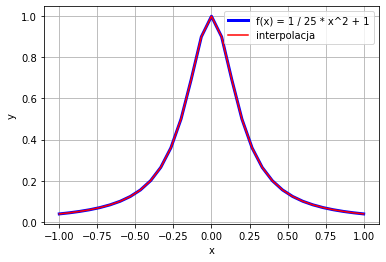

2.220446049250313e-16

In [38]:
# Interpolacja funkcją z pakietu scipy.interpolate.splprep

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: 1 / (25 * x ** 2 + 1)
y = f(x)
splrep = scipy.interpolate.splrep(x, y)
ysplrep = scipy.interpolate.splev(x, splrep)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = 1 / 25 * x^2 + 1")
plt.plot(x, ysplrep, 'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), ysplrep)

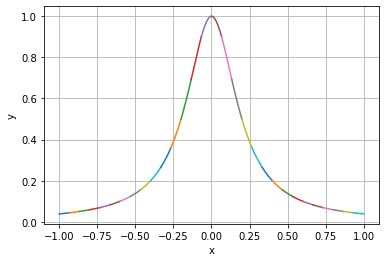

0.9615277218829653

In [3]:
# Interpolacja funkcją z zadania 4

def PolyCoefficients2(x, x0, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i] * (x-x0) ** i
    return y

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: 1 / (25 * x ** 2 + 1)
y = f(x)
b, c, d = main.cubic_spline(x, y)
f1 = [(y[i], b[i], c[i], d[i]) for i in range(len(b))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1], 1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x[i], f1[i]))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

main.L_inf(x_new, f(x_new))


Interpolowano funkcję $ f(x) = \frac{1}{25x^2+1}$ dwoma metodami: wbudowaną funkcją scipy.interpolate.splprep oraz funkcją cubic_spline. W tym celu lekko zmodyfikowano funkcję PolyCoefficients, dodając dodatkowy parametr (wartość początku przedziału), oraz zmieniono obliczanie wartości funkcji (y).

Ponownie wbudowana funkcja okazała się być najlepsza, z błędem rzędu 10^-16. Błąd funkcji cubic_spline był rzędu 10^-1.

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


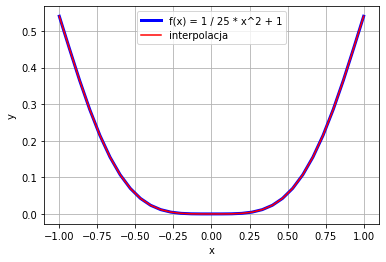

2.220446049250313e-16

In [11]:
# Interpolacja funkcją z pakietu scipy.interpolate.splprep

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: np.cos(x)* x ** 4
y = f(x)
splrep = scipy.interpolate.splrep(x, y)
ysplrep = scipy.interpolate.splev(x, splrep)
plt.plot(x, f(x) ,'b',  linewidth=3 ,label = "f(x) = 1 / 25 * x^2 + 1")
plt.plot(x, ysplrep, 'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

main.L_inf(f(x), ysplrep)

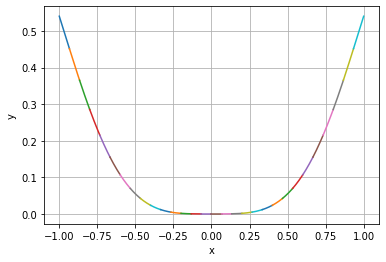

0.48170945487209765

In [12]:
# Interpolacja funkcją z zadania 4

def PolyCoefficients2(x, x0, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i] * (x-x0) ** i
    return y

x = np.linspace(-1+1e-5,1-1e-5,31)
f = lambda x: np.cos(x)* x ** 4
y = f(x)
b, c, d = main.cubic_spline(x, y)
f1 = [(y[i], b[i], c[i], d[i]) for i in range(len(b))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1], 1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x[i], f1[i]))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

main.L_inf(x_new, f(x_new))

Analogicznie jak w zadaniu 5, interpolowano funkcję $ f(x) = cos(x)x^4$ dwoma metodami: wbudowaną funkcją z pakietu scipy.interpolate.splprep oraz funkcją z zadania 4.

Ponownie wbudowana funkcja okazała się być dużo dokładniejsza od zaimplementowanej funkcji cubic_spline.

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

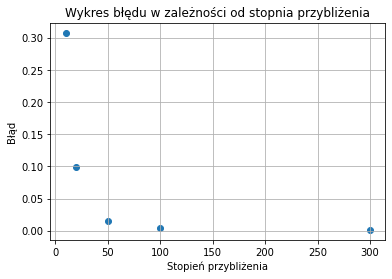

In [8]:
# Interpolacja funkcją z zadania 1

interpolation_levels = np.array([10, 20, 50, 100, 300])
error = []
f = lambda x: np.abs(np.sin(5*x))**3

for n in interpolation_levels:
    x = np.linspace(-1+1e-5,1-1e-5, n)
    a,b=main.first_spline(x,f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f_c[i]) 
        y_abs = np.append(y_abs, y_new)
        x_abs = np.append(x_abs, x_new)

    error.append(main.L_inf(y_abs, f(x_abs)))
plt.scatter(interpolation_levels, error)


plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Stopień przybliżenia")
plt.ylabel("Błąd")
plt.grid()
plt.show()

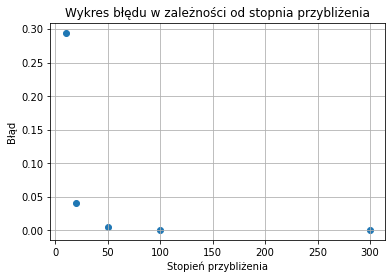

In [6]:
# Interpolacja funkcją z zadania 4

interpolation_levels = [10, 20, 50, 100, 300]
f = lambda x: np.abs(np.sin(5*x))**3
error = []

for n in interpolation_levels:
    x = np.linspace(-1+1e-5,1-1e-5, n)
    y = f(x) 
    Y = np.array([]) 
    X = np.array([])
    b, c, d = main.cubic_spline(x, y)
    f1 = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],1000)
        y_new = PolyCoefficients2(x_new, x[i], f1[i])
        Y = np.append(Y, y_new)
        X = np.append(X, x_new)

    error.append(main.L_inf(Y, f(X)))


plt.scatter(interpolation_levels, error)
plt.title("Wykres błędu w zależności od stopnia przybliżenia")
plt.xlabel("Stopień przybliżenia")
plt.ylabel("Błąd")
plt.grid()

Wykresy są bardzo podobne, jednak można zauważyć że dla małych stopni przybliżenia (20, 50) funkcja cubic_spline jest dokładniejsza, jednak kosztem znacznie dłuższego czasu potrzebnego na obliczenia.

Wnioski:

Ćwiczenia pokazały różne metody interpolacji zadanych funkcji - poprzez wbudowaną funkcję z pakietu scipy.interpolate.splprep, spline 1 stopnia, spline kubiczny, czy też metodą barycentryczną (poznaną na poprzednim labolatorium). Zawsze najdokładniejszą metodą było zastosowanie wbudowanej funkcji.